## Runlu QU
## Valentin PORTILLO

## Quadratic detection of random signal in white gaussian noise

In [90]:
import scipy.stats as st 
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# Constant values
NbTests = 10000; sigma_S = 10; sigma_W = 1; N = 10;
p = 0.5
rho = sigma_S**2 / sigma_W**2
# threshold (lamda squared in sheet)
threshold = sigma_W**2 * (rho + 1) / rho * np.log(rho + 1)
epsilon = st.bernoulli.rvs(p,size = NbTests)  # Generate Epsilon
W = sigma_W * (np.random.randn(NbTests, N)) # Generate noise
S = sigma_S * (np.random.randn(NbTests, N)) # Generate signal

Calculate vector X: ε(S+W)+(1−ε)W

In [141]:
X = np.empty((NbTests, N))
for i in range(NbTests): 
    for j in range(N):
        X[i][j] = epsilon[i]*(S[i][j] + W[i][j]) + (1 - epsilon[i])*W[i][j]

Check whether the generated values are up or down the threshold

In [145]:
"""Decision = np.zeros(NbTests, dtype=np.int16)
for i in range(NbTests):
    for j in range(N):
        if X[i][j] ** 2  > threshold:
            Decision[i] = 1"""
Decision = np.zeros(NbTests, dtype=np.int16)
for i in range(NbTests):
    if np.all( X[i]**2 > threshold ):
        Decision[i] = 1

use Qchi2 because we're calculating the threshold as a quadratic

In [146]:
# Error rates and probability of error
Q = st.norm.sf 
Qchi2 = st.chi2.sf

ErrorRate = np.mean(Decision != epsilon)
Pe = 1/2 + Qchi2(np.sqrt((rho + 1)/rho*np.log(rho + 1)), N) - Qchi2(np.sqrt(np.log(rho + 1)/rho), N)
print('Error Rate           : {}'.format(ErrorRate))
print('Probability of error : {}'.format(Pe))

Error Rate           : 0.4219
Probability of error : 0.49496997729448833


In [149]:
NbTests = 100000
N = 10
sigma_W = 1
rho_db = np.arange(-10,51); rho = 10 ** (rho_db/10)
sigma_S = np.sqrt(rho * sigma_W**2)
threshold = sigma_W**2 * (rho + 1) / rho * np.log(rho + 1)
threshold.shape

(61,)

In [154]:
NbTests = 100000
N = 10
sigma_W = 1
rho_db = np.arange(-10,51); rho = 10 ** (rho_db/10)
sigma_S = np.sqrt(rho * sigma_W**2)
threshold = sigma_W**2 * (rho + 1) / rho * np.log(rho + 1)
ErrorRate = np.zeros_like(rho)

for r in range(len(rho)):
    epsilon = st.bernoulli.rvs(p = 0.5,size = NbTests)  # Generate Epsilon
    W = sigma_W * (np.random.randn(NbTests, N)) 
    S = sigma_S[r] * (np.random.randn(NbTests, N))
    # Generate observations
    X = np.empty((NbTests, N))
    for i in range(NbTests): 
        for j in range(N):
            X[i][j] = epsilon[i]*(S[i][j] + W[i][j]) + (1 - epsilon[i])*W[i][j]
    # Calculate decisions
    Decision = np.zeros(NbTests, dtype=np.int16)
    for i in range(NbTests):
        if np.all( X[i]**2 > threshold[r] ):
            Decision[i] = 1
    # Error rate
    ErrorRate[r] = np.mean(Decision != epsilon)    
# Probability of error
Pe = 1/2 + Qchi2(np.sqrt((rho + 1)/rho*np.log(rho + 1)), N) - Qchi2(np.sqrt(np.log(rho + 1)/rho), N)

In [155]:
ErrorRate

array([0.50088, 0.50258, 0.50023, 0.50036, 0.49984, 0.50165, 0.50282,
       0.50043, 0.50125, 0.50151, 0.49585, 0.4998 , 0.49961, 0.50125,
       0.50308, 0.50009, 0.49765, 0.50155, 0.49931, 0.49721, 0.49576,
       0.49429, 0.49504, 0.48647, 0.48032, 0.47547, 0.46651, 0.45927,
       0.44899, 0.43726, 0.42464, 0.40977, 0.39428, 0.37441, 0.35487,
       0.33761, 0.31813, 0.30161, 0.28293, 0.2657 , 0.24686, 0.23212,
       0.21352, 0.19806, 0.18061, 0.16724, 0.15502, 0.1428 , 0.13056,
       0.1184 , 0.10866, 0.09834, 0.08972, 0.08252, 0.07527, 0.06679,
       0.06011, 0.05575, 0.05049, 0.04514, 0.04046])

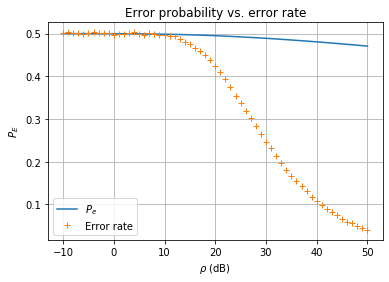

In [157]:
h_fig, h_ax = plt.subplots() 
h_ax.plot(rho_db, Pe, label='$P_e$'),h_ax.plot(rho_db, ErrorRate, '+', label='Error rate')
h_ax.set_xlabel('$\\rho$ (dB)'); h_ax.set_ylabel('$P_E$') 
h_ax.set_title('Error probability vs. error rate'); h_ax.legend(); h_ax.grid(which='both')

**As we can see, while the value of rho is near zero, the estimated percentage of error is near the probability of error, but when we have high values of rho, the chances of getting an actual error decreases (Error rate) but the theoretical value still high (Pe).**

## The Neyman Pearson test and the GLRT

In [91]:
Q = st.norm.sf
Qinv = st.norm.isf

In [93]:
NbTests = 1000000  # Number of tests
A = 1
alpha = 1e-2  # size
dim = 2  # Dimension
V_XI_0 = 1/np.sqrt(dim) * np.ones(dim)
sigma = 2
# Threshold
threshold = sigma * Qinv(alpha)

In [125]:
m_y = sigma * np.random.randn(NbTests, dim)

# Decision under the null hypothesis
v_d = np.sign(A) * m_y @ V_XI_0 > threshold  # @ : produit matriciel

# Size
d_pfa_mes = np.mean(v_d)
print('Estimated size   : {}'.format(d_pfa_mes))
print('Theoretical size : {}'.format(alpha))

Estimated size   : 0.009944
Theoretical size : 0.01


In [107]:
m_y = sigma * np.random.randn(NbTests, dim) + A * V_XI_0

# Decision under the alternative hypothesis
v_d = np.sign(A) * m_y @ V_XI_0 > threshold  # @ : produit matriciel
# Estimate the power
d_power_mes = np.mean(v_d)
print('Estimated power   : {}'.format(d_power_mes))
# Calculate the theoretical power
d_power_th = Q(Qinv(alpha) - abs(A)/sigma)
print('Theoretical Power : {}'.format(d_power_th))

Estimated power   : 0.033613
Theoretical Power : 0.03389893912284281


In [111]:
Decision = np.zeros(NbTests, dtype=np.int16)
epsilon = 2
left = abs(m_y * epsilon)
right = sigma * Qinv(alpha / 2)
for i in range(NbTests):
    if np.all(left[i] > right):
        Decision[i] = 1

In [127]:
B_glkt = Q( Qinv( alpha / 2)- A / sigma ) + Q ( Qinv (alpha / 2)+ A / sigma )
B_glkt

0.020004460473822212

In [126]:
np.mean(Decision != v_d)

0.059168

In [160]:
threshold

4.6526957480816815

In [171]:
NbTests = 1000
A = np.arange(0.5, 5, 0.5)
alpha = 1e-2  # size
dim = 2  # Dimension
V_XI_0 = 1/np.sqrt(dim) * np.ones(dim)
sigma = 2
# Threshold
threshold = sigma * Qinv(alpha)

estimated_size = np.zeros_like(A)
estimated_power = np.zeros_like(A)
theoretical_power = np.zeros_like(A)

for i in range(len(A)):
    m_y = sigma * np.random.randn(NbTests, dim)

    v_d = np.sign(A[i]) * m_y @ V_XI_0 > threshold  # @ : produit matriciel

    d_pfa_mes = np.mean(v_d)
    estimated_size[i] = d_pfa_mes
    
    m_y = sigma * np.random.randn(NbTests, dim) + A[i] * V_XI_0

    v_d = np.sign(A[i]) * m_y @ V_XI_0 > threshold  # @ : produit matriciel
    # Estimate the power
    d_power_mes = np.mean(v_d)
    
    estimated_power[i] = d_power_mes
    
    d_power_th = Q(Qinv(alpha) - abs(A[i])/sigma)
    theoretical_power[i] = d_power_th

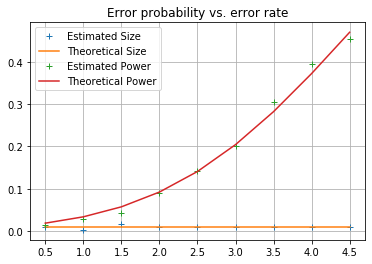

In [177]:
h_fig, h_ax = plt.subplots() 
h_ax.plot(A, estimated_size, '+', label='Estimated Size')
h_ax.plot(A, [alpha for i in range(len(A))], label='Theoretical Size')
h_ax.plot(A, estimated_power, '+', label='Estimated Power')
h_ax.plot(A, theoretical_power, label='Theoretical Power')
h_ax.set_title('Error probability vs. error rate'); h_ax.legend(); h_ax.grid(which='both')

**As we can see the theoretical and the estimated values are nearly the same. So, the estimation of the correctness of the hypothesis is accurate and trustful maybe just having into account a percentage of a failure range would be a good idea.**